In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df=df[df["species"]!="setosa"]
df

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df["species"].unique()

array(['versicolor', 'virginica'], dtype=object)

In [7]:
df["species"]=df["species"].map({"versicolor":0,"virginica":1})

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [9]:
X=df.iloc[:,:-1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [10]:
y=df.iloc[:,-1]
y.head()

50    0
51    0
52    0
53    0
54    0
Name: species, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [13]:
rg=LogisticRegression()
rg

LogisticRegression()

In [14]:
rg.fit(X_train,y_train)

LogisticRegression()

In [15]:
y_test

133    1
103    1
120    1
95     0
94     0
89     0
72     0
130    1
60     0
50     0
68     0
80     0
123    1
83     0
140    1
54     0
126    1
127    1
62     0
81     0
105    1
138    1
76     0
92     0
119    1
65     0
90     0
146    1
59     0
122    1
Name: species, dtype: int64

In [16]:
y_predict=rg.predict(X_test)

In [17]:
accuracy=accuracy_score(y_predict,y_test)
print("Accuracy of the model is :",accuracy)

Accuracy of the model is : 0.9333333333333333


In [18]:
print(classification_report(y_predict,y_test))


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



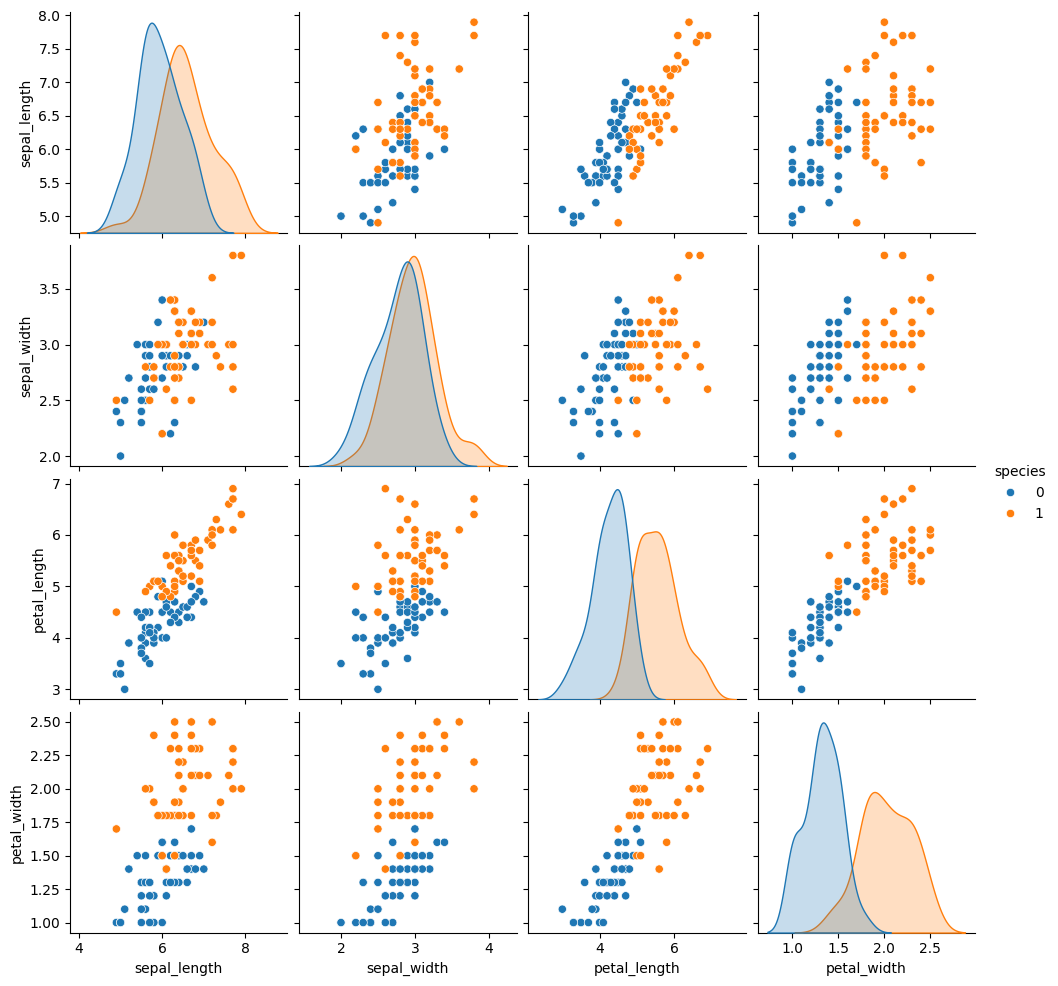

In [19]:
sns.pairplot(df,hue="species")

In [20]:
corr=df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000


<Axes: >

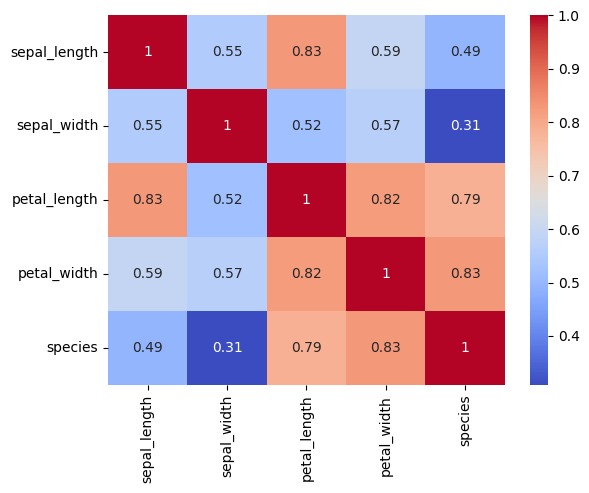

In [21]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

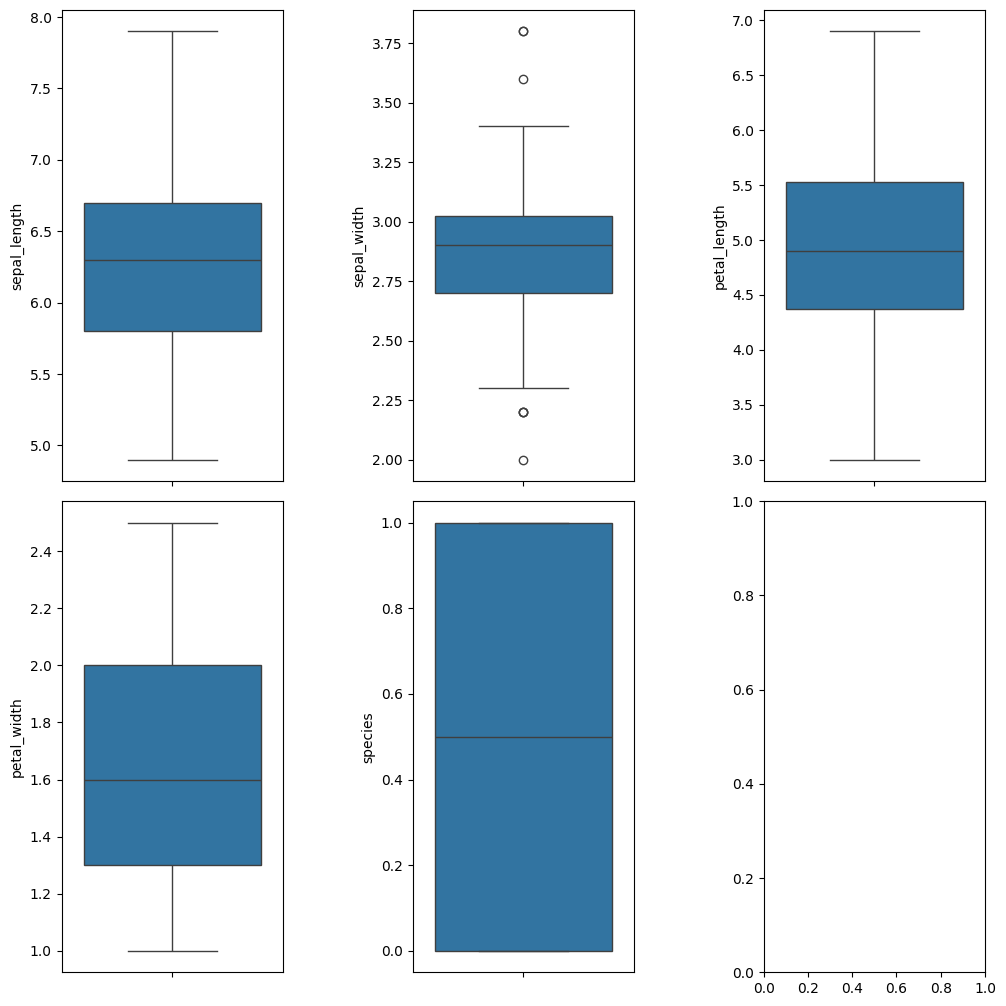

In [22]:
col ,ax=plt.subplots(ncols=3,nrows=2,figsize=(10,10))
index=0
ax=ax.flatten()
for col ,value in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index+=1
    plt.tight_layout(pad=0.5,h_pad=0.7,w_pad=5.0)

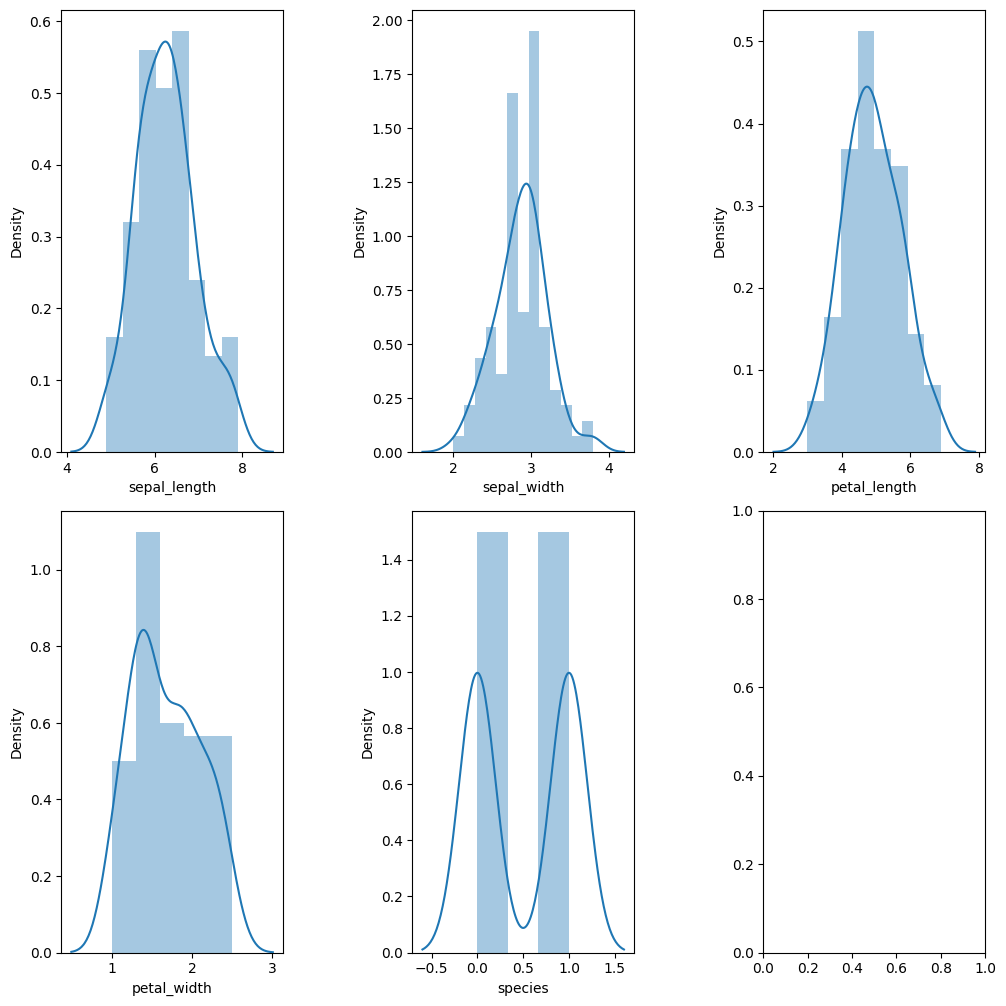

In [23]:
col ,ax=plt.subplots(ncols=3,nrows=2,figsize=(10,10))
index=0
ax=ax.flatten()
for col ,value in df.items():
    sns.distplot(value,ax=ax[index])
    index+=1
    plt.tight_layout(pad=0.5,h_pad=0.7,w_pad=5.0)